In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv(r"C:\Users\Sahil Raj\Downloads\Credit-Score-Data\Credit Score Data\train.csv")
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good
3,5637,3392,4,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,31.377862,268.0,No,49.574949,21.46538,Low_spent_Small_value_payments,223.451310,Good
4,5638,3392,5,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,...,Good,809.98,24.797347,269.0,No,49.574949,21.46538,High_spent_Medium_value_payments,341.489231,Good


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [10]:
import psycopg2 as psy
connection=psy.connect(database='mini_project',user='postgres',password='sahilrj802')
cursor=connection.cursor()


In [11]:
cursor.execute('drop table if exists crdit_score')
cursor.execute("""
    create table crdit_score (
        
                                ID integer,Customer_ID  integer,Month integer,Name text,Age float,SSN float,Occupation text,                
  Annual_Income float,         
   Monthly_Inhand_Salary float,    
   Num_Bank_Accounts float,       
  Num_Credit_Card float,      
  Interest_Rate float,         
  Num_of_Loan float,        
  Type_of_Loan text,         
  Delay_from_due_date float,        
  Num_of_Delayed_Payment float,   
   Changed_Credit_Limit float,  
   Num_Credit_Inquiries float,  
   Credit_Mix text,    
  Outstanding_Debt float,  
   Credit_Utilization_Ratio float, 
  Credit_History_Age float, 
  Payment_of_Min_Amount text, 
  Total_EMI_per_month float, 
  Amount_invested_monthly float, 
  Payment_Behaviour text,     
  Monthly_Balance float, 
  Credit_Score text
    )
""")


In [12]:

for i in data.index:
    vals=[data.at[i,col] for col in list(data.columns)]
    query="insert into crdit_score values('%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s')"%(vals[0],vals[1],vals[2],vals[3],vals[4],vals[5],vals[6],vals[8],vals[7],vals[9],vals[10],vals[11],vals[12],vals[13],vals[14],vals[15],vals[16],vals[17],vals[18],vals[19],vals[20],vals[21],vals[22],vals[23],vals[24],vals[25],vals[26],vals[27])
    cursor.execute(query)
    connection.commit()


In [6]:
query='select * from credit_score'
df = pd.read_sql_query(query, connection)
df.tail()

C:\Users\Sahil Raj\AppData\Local\Temp\ipykernel_6484\3527013689.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


,id,customer_id,month,name,age,ssn,occupation,annual_income,monthly_inhand_salary,num_bank_accounts,...,credit_mix,outstanding_debt,credit_utilization_ratio,credit_history_age,payment_of_min_amount,total_emi_per_month,amount_invested_monthly,payment_behaviour,monthly_balance,credit_score
99995,155625,37932,4,Nicks,25.0,78735990.0,Mechanic,3359.415833,39628.99,4.0,...,Good,502.38,34.663572,378.0,No,35.104023,24.028477,High_spent_Large_value_payments,479.866228,Poor
99996,155626,37932,5,Nicks,25.0,78735990.0,Mechanic,3359.415833,39628.99,4.0,...,Good,502.38,40.565631,379.0,No,35.104023,24.028477,High_spent_Medium_value_payments,496.651610,Poor
99997,155627,37932,6,Nicks,25.0,78735990.0,Mechanic,3359.415833,39628.99,4.0,...,Good,502.38,41.255522,380.0,No,35.104023,24.028477,High_spent_Large_value_payments,516.809083,Poor
99998,155628,37932,7,Nicks,25.0,78735990.0,Mechanic,3359.415833,39628.99,4.0,...,Good,502.38,33.638208,381.0,No,35.104023,24.028477,Low_spent_Large_value_payments,319.164979,Standard
99999,155629,37932,8,Nicks,25.0,78735990.0,Mechanic,3359.415833,39628.99,4.0,...,Good,502.38,34.192463,382.0,No,35.104023,24.028477,High_spent_Medium_value_payments,393.673696,Poor


In [7]:
connection.close()

# Exploratory Data Analysis

In [2]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

In [3]:
print(data.isnull().sum())

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64


In [17]:
data["Credit_Score"].value_counts()

Standard    53174
Poor        28998
Good        17828
Name: Credit_Score, dtype: int64

<AxesSubplot:xlabel='Occupation', ylabel='count'>

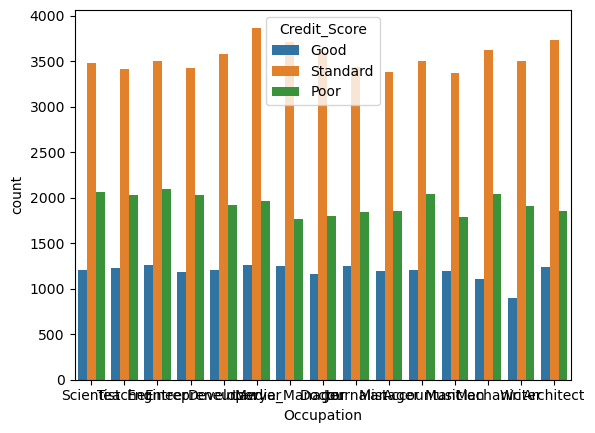

In [39]:
sns.countplot(x=data['Occupation'],hue=data['Credit_Score'])

<AxesSubplot:xlabel='Annual_Income', ylabel='Credit_Score'>

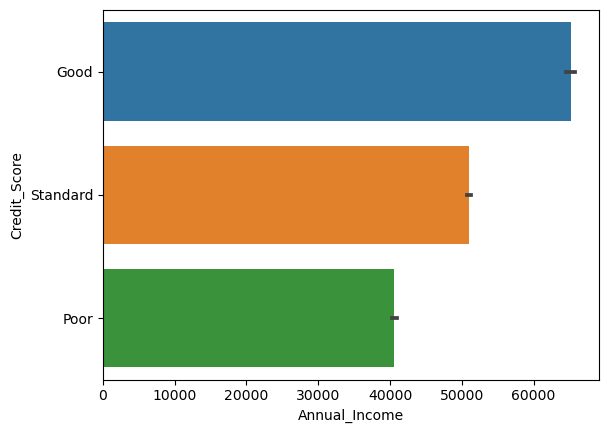

In [7]:
sns.barplot(x=data['Annual_Income'],y=data["Credit_Score"])

<AxesSubplot:xlabel='Monthly_Inhand_Salary', ylabel='Credit_Score'>

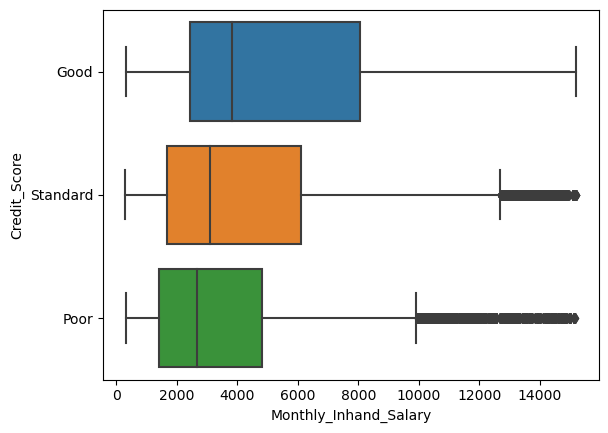

In [13]:
sns.boxplot(x=data['Monthly_Inhand_Salary'],y=data["Credit_Score"])

<AxesSubplot:xlabel='Num_Bank_Accounts', ylabel='Credit_Score'>

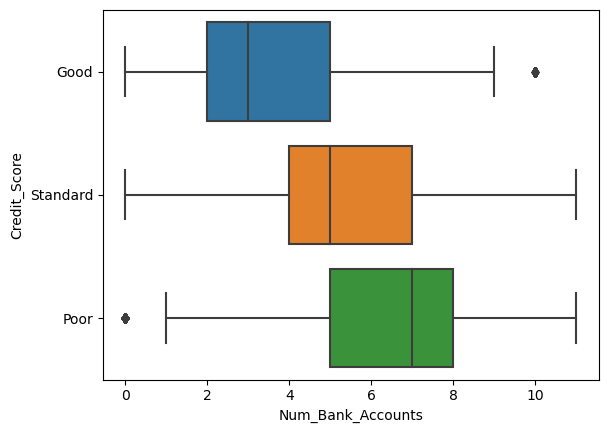

In [19]:
sns.boxplot(x=data['Num_Bank_Accounts'],y=data["Credit_Score"])

<AxesSubplot:xlabel='Num_Credit_Card', ylabel='Credit_Score'>

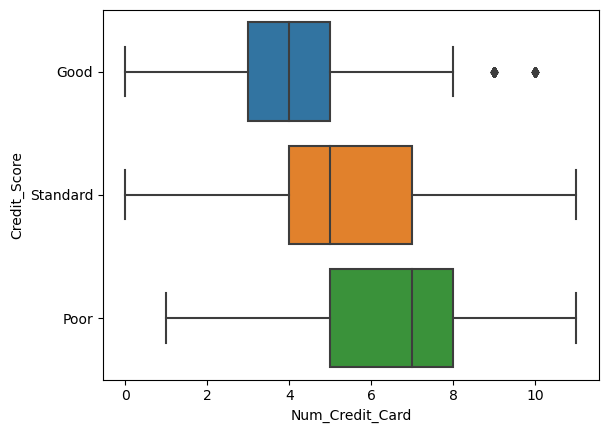

In [21]:
sns.boxplot(x=data['Num_Credit_Card'],y=data["Credit_Score"])

<AxesSubplot:xlabel='Interest_Rate', ylabel='Credit_Score'>

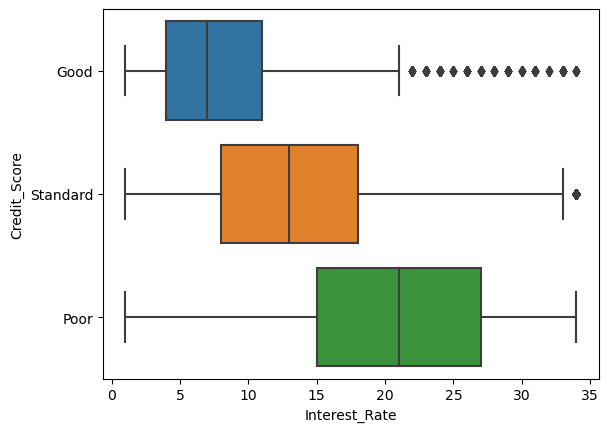

In [22]:
sns.boxplot(x=data['Interest_Rate'],y=data["Credit_Score"])

<AxesSubplot:xlabel='Num_of_Loan', ylabel='Credit_Score'>

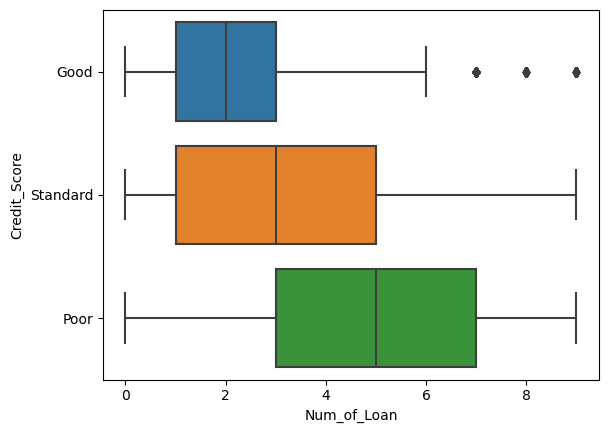

In [23]:
sns.boxplot(x=data['Num_of_Loan'],y=data["Credit_Score"])

<AxesSubplot:xlabel='Delay_from_due_date', ylabel='Credit_Score'>

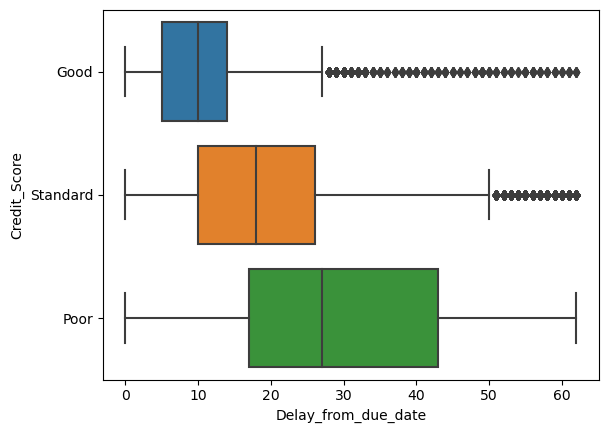

In [24]:
sns.boxplot(x=data['Delay_from_due_date'],y=data["Credit_Score"])

<AxesSubplot:xlabel='Num_of_Delayed_Payment', ylabel='Credit_Score'>

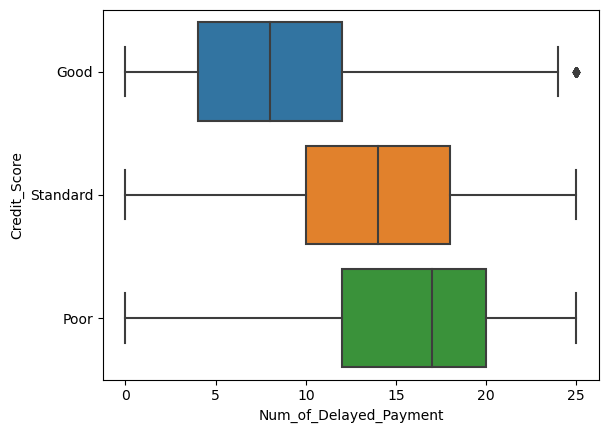

In [25]:
sns.boxplot(x=data['Num_of_Delayed_Payment'],y=data["Credit_Score"])

<AxesSubplot:xlabel='Outstanding_Debt', ylabel='Credit_Score'>

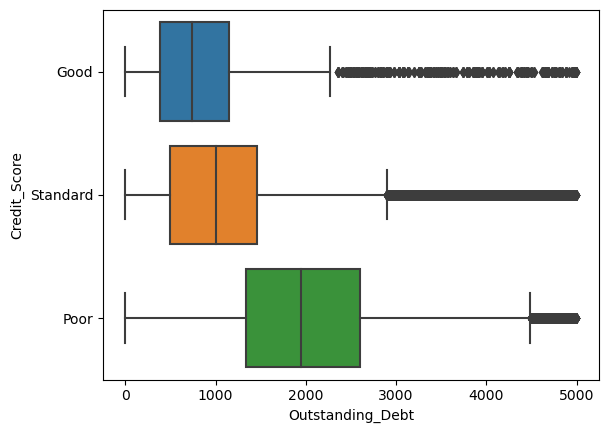

In [26]:
sns.boxplot(x=data['Outstanding_Debt'],y=data["Credit_Score"])

<AxesSubplot:xlabel='Credit_Utilization_Ratio', ylabel='Credit_Score'>

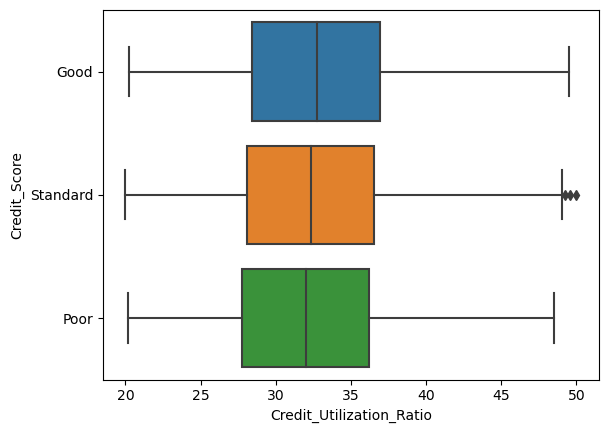

In [27]:
sns.boxplot(x=data['Credit_Utilization_Ratio'],y=data["Credit_Score"])

<AxesSubplot:xlabel='Credit_History_Age', ylabel='Credit_Score'>

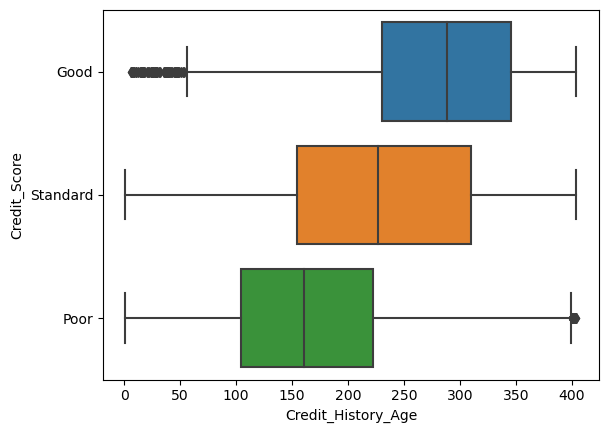

In [29]:
sns.boxplot(x=data['Credit_History_Age'],y=data["Credit_Score"])

<AxesSubplot:xlabel='Total_EMI_per_month', ylabel='Credit_Score'>

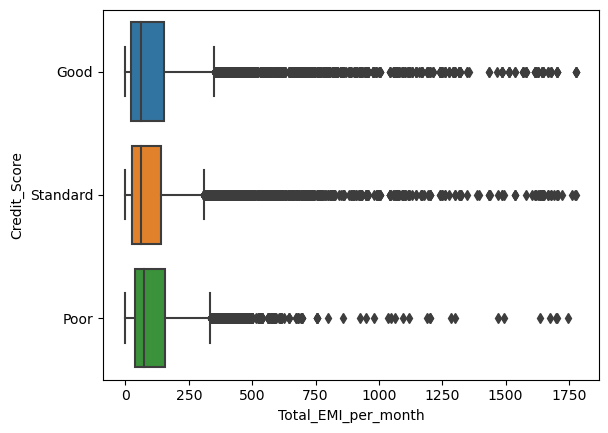

In [30]:
sns.boxplot(x=data['Total_EMI_per_month'],y=data["Credit_Score"])

<AxesSubplot:xlabel='Amount_invested_monthly', ylabel='Credit_Score'>

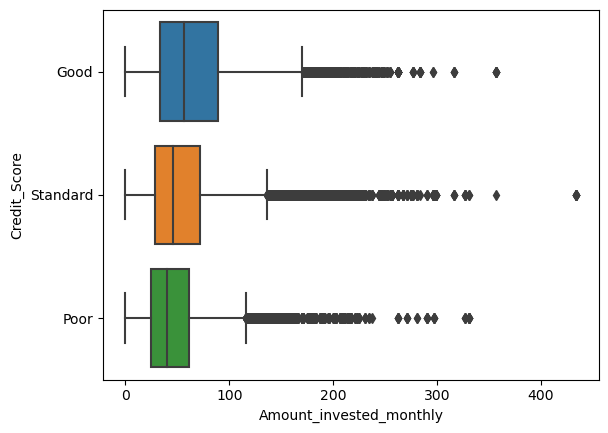

In [32]:
sns.boxplot(x=data['Amount_invested_monthly'],y=data["Credit_Score"])

<AxesSubplot:xlabel='Monthly_Balance', ylabel='Credit_Score'>

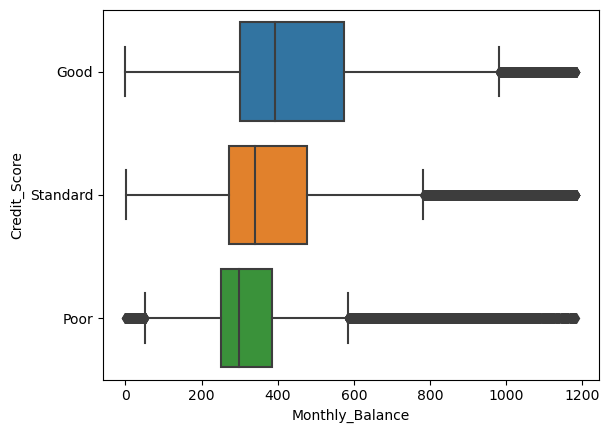

In [33]:
sns.boxplot(x=data['Monthly_Balance'],y=data["Credit_Score"])

# Data pre-processing

In [58]:
#Mapping the standard ,Good and Bad as 1,2,0
data["Credit_Mix"] = data["Credit_Mix"].map({"Standard": 1, 
                               "Good": 2, 
                               "Bad": 0})

In [14]:
#Spliting the dataset into train and test 
from sklearn.model_selection import train_test_split
x = np.array(data[["Annual_Income", "Monthly_Inhand_Salary", 
                   "Num_Bank_Accounts", "Num_Credit_Card", 
                   "Interest_Rate", "Num_of_Loan", 
                   "Delay_from_due_date", "Num_of_Delayed_Payment", 
                   "Credit_Mix", "Outstanding_Debt", 
                   "Credit_History_Age", "Monthly_Balance"]])
y = np.array(data[["Credit_Score"]])

In [18]:
y.shape

(100000, 1)

# fitting the data into the model

In [48]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(xtrain, ytrain)

C:\Users\Sahil Raj\AppData\Local\Temp\ipykernel_12900\3657192656.py:4: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier()

In [49]:
#model score
model.score(xtest,ytest)

0.8135

# evaluation of the model

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make predictions on the test set
y_pred = model.predict(xtest)

# Calculate precision, recall, and F1 score
precision = precision_score(ytest, y_pred, average='weighted')
recall = recall_score(ytest, y_pred, average='weighted')
f1 = f1_score(ytest, y_pred, average='weighted')

# Print results
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))


Precision: 0.81
Recall: 0.81
F1 Score: 0.81


<AxesSubplot:>

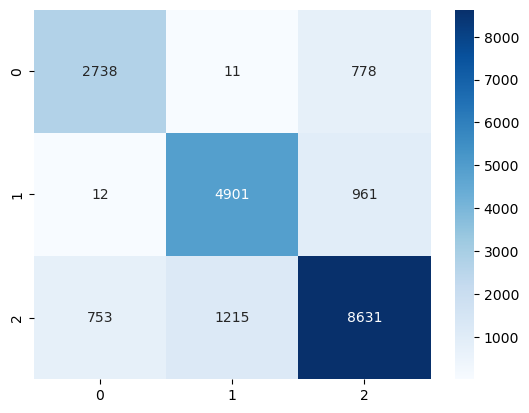

In [50]:
from sklearn.metrics import confusion_matrix


y_pred = model.predict(xtest)
cm = confusion_matrix(ytest, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")


In [60]:
#Classifying the credit score on the basis of the entered values

In [43]:
print("Credit Score Prediction : ")
a = float(input("Annual Income: "))
b = float(input("Monthly Inhand Salary: "))
c = float(input("Number of Bank Accounts: "))
d = float(input("Number of Credit cards: "))
e = float(input("Interest rate: "))
f = float(input("Number of Loans: "))
g = float(input("Average number of days delayed by the person: "))
h = float(input("Number of delayed payments: "))
i = input("Credit Mix (Bad: 0, Standard: 1, Good: 3) : ")
j = float(input("Outstanding Debt: "))
k = float(input("Credit History Age: "))
l = float(input("Monthly Balance: "))

features = np.array([[a, b, c, d, e, f, g, h, i, j, k, l]])
print("Predicted Credit Score = ", model.predict(features))

Credit Score Prediction : 
Annual Income: 1000000
Monthly Inhand Salary: 1200000
Number of Bank Accounts: 43555
Number of Credit cards: 2
Interest rate: 2
Number of Loans: 1
Average number of days delayed by the person: 1
Number of delayed payments: 2
Credit Mix (Bad: 0, Standard: 1, Good: 3) : 2
Outstanding Debt: 1
Credit History Age: 2
Monthly Balance: 1456789
Predicted Credit Score =  ['Good']


In [ ]:
import psycopg2 as psy
connection=psy.connect(database='mini_project',user='postgres',password='sahilrj802')
cursor=connection.cursor()
cursor.execute('drop table if exists Credit_Score')
cursor.execute("""
    create table Credit_Score (
        
                                ID text,Customer_ID text,Month text,Age float,SSN text,Occupation text,                
  Annual_Income float,         
   Monthly_Inhand_Salary float,    
   Num_Bank_Accounts integer,       
  Num_Credit_Card integer,      
  Interest_Rate integer,         
  Num_of_Loan float,                
  Delay_from_due_date integer,        
  Num_of_Delayed_Payment float,   
   Changed_Credit_Limit float,  
   Num_Credit_Inquiries float,  
   Credit_Mix text,    
  Outstanding_Debt float,  
   Credit_Utilization_Ratio float, 
  Credit_History_Age text, 
  Payment_of_Min_Amount text, 
  Total_EMI_per_month float, 
  Amount_invested_monthly float, 
  Payment_Behaviour text,     
  Monthly_Balance float,
  Credit_score text
    )
""")
for i in df.index:
    vals=[df.at[i,col] for col in list(df.columns)]
    query="insert into credit_score values('%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s','%s')"%(vals[0],vals[1],vals[2],vals[3],vals[4],vals[5],vals[6],vals[8],vals[7],vals[9],vals[10],vals[11],vals[12],vals[13],vals[14],vals[15],vals[16],vals[17],vals[18],vals[19],vals[20],vals[21],vals[22],vals[23],vals[24],vals[25])
    cursor.execute(query)
    connection.commit()
